In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster

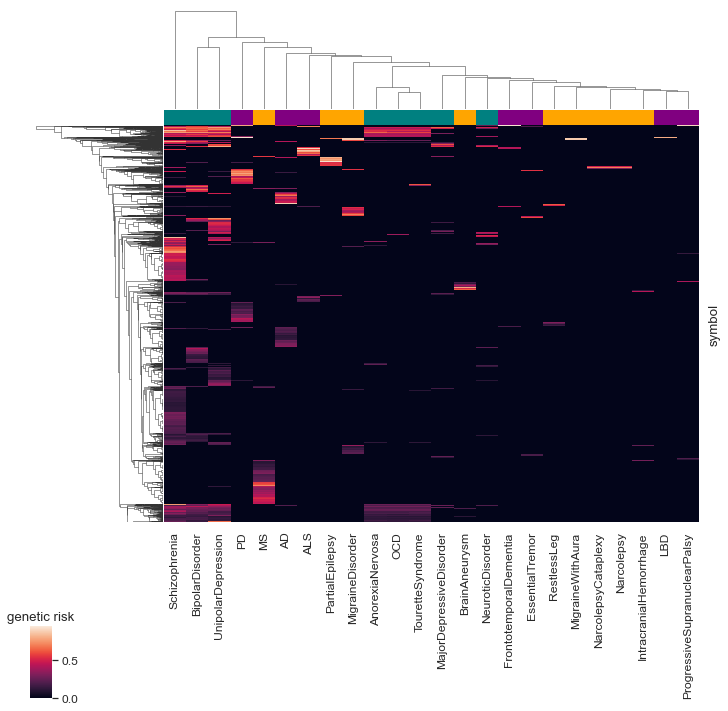

In [88]:
sns.set(font_scale=1.1)

df = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/risk-score-all-diseases.csv')
df = df.drop_duplicates(subset = ['symbol'])
df = df.set_index('symbol')
x0, _y0, _w, _h = g.cbar_pos

g = sns.clustermap(df, col_colors = row_colors,yticklabels=False)
g.ax_cbar.set_position([x0, 0.02, g.ax_row_dendrogram.get_position().width/6, 0.1])
g.ax_cbar.set_title('genetic risk')

plt.savefig('plots/01-clustering_genes_and_diseases/clustermap_genetic_association.pdf')
plt.savefig('plots/01-clustering_genes_and_diseases/clustermap_genetic_association.png', dpi = 300)
plt.show()

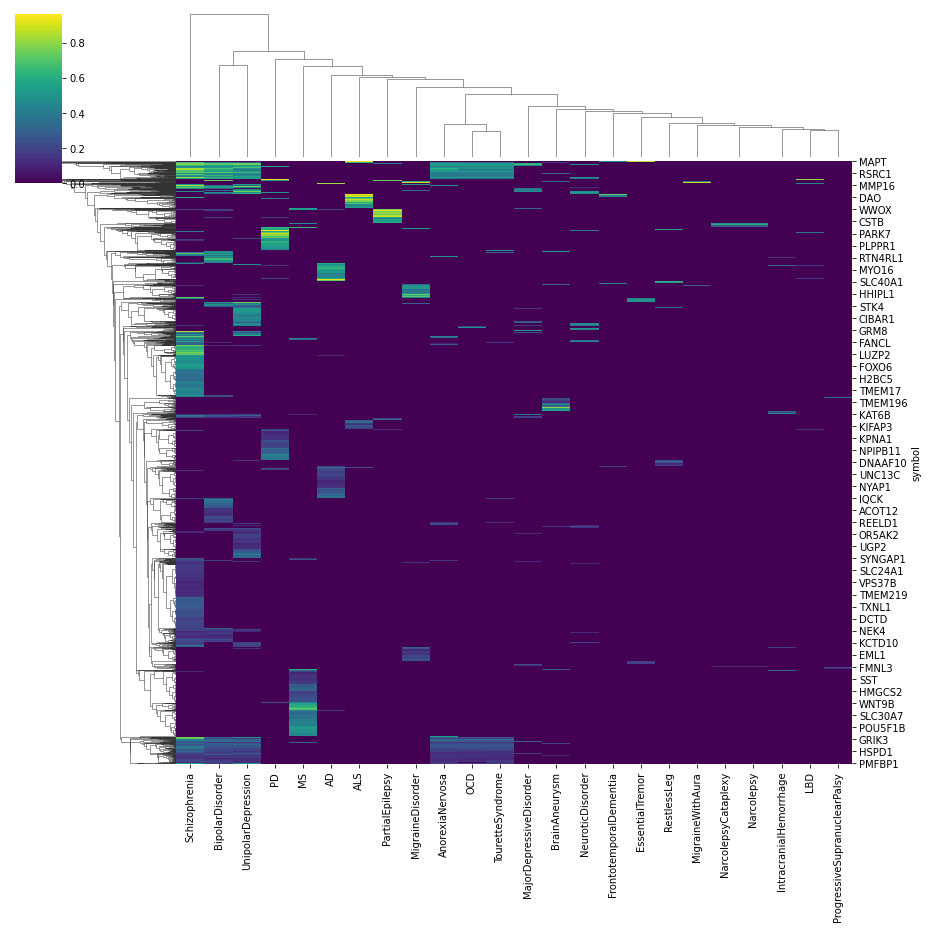

In [3]:

row_linkage = hierarchy.linkage(
    distance.pdist(df), method='average')

col_linkage = hierarchy.linkage(
    distance.pdist(df.T), method='average')

sns.clustermap(df, row_linkage=row_linkage, col_linkage=col_linkage, method="average",
                figsize=(13, 13), cmap='viridis')

# Extract genes associated with psychiatric disorders

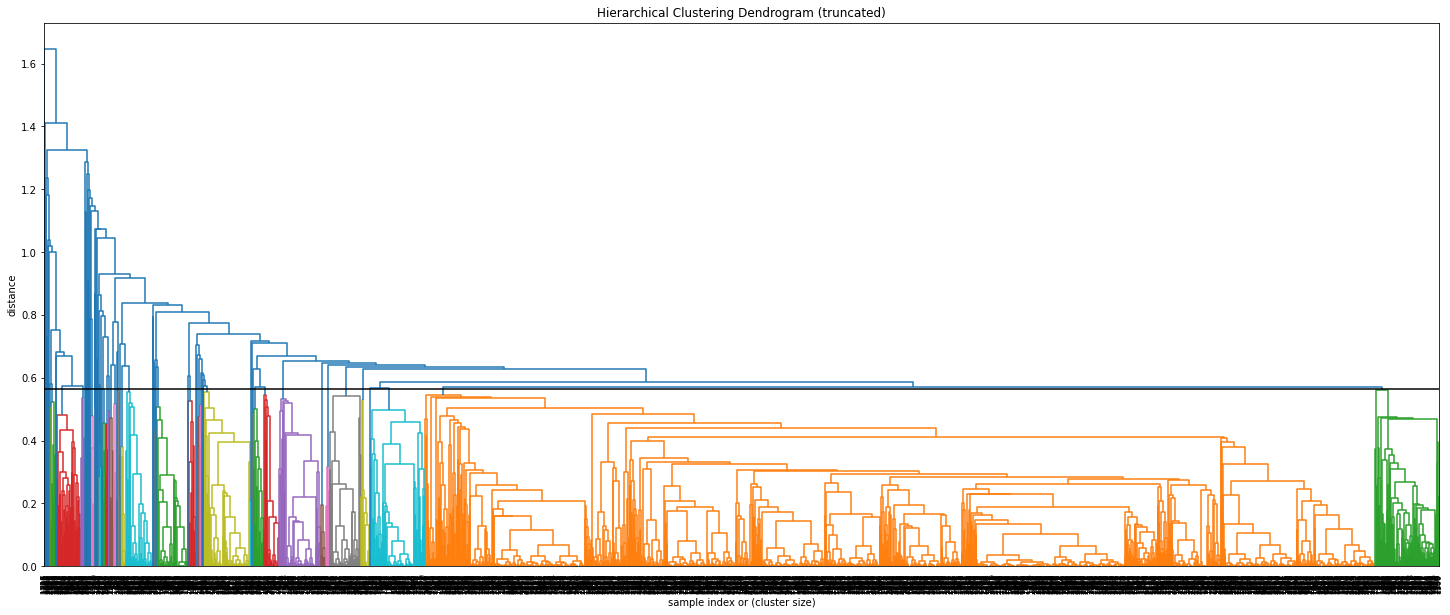

In [4]:




def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    row_linkage,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    annotate_above = 10,
    max_d=0.565
)
plt.show()

In [5]:
clusters0565 = fcluster(row_linkage, 0.565, criterion='distance')


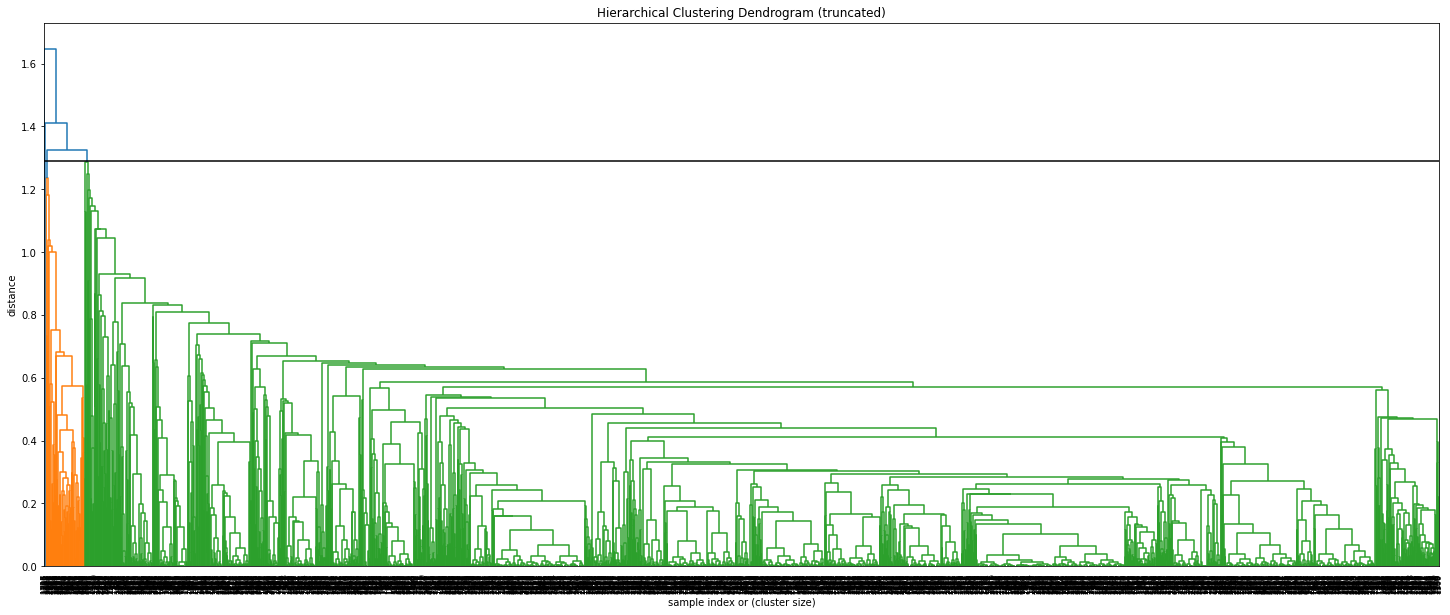

In [6]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    row_linkage,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    annotate_above = 10,
    max_d=1.29
)
plt.show()

In [7]:
clusters129 = fcluster(row_linkage, 1.29, criterion='distance')

In [8]:
df['cluster2129'] = clusters129
df['cluster0565'] = clusters0565


In [9]:
#High neuropsychiatric risk
#2129
df.loc['RSRC1']

df[df['cluster2129']==1.0]

,AD,ALS,AnorexiaNervosa,BipolarDisorder,BrainAneurysm,EssentialTremor,FrontotemporalDementia,IntracranialHemorrhage,LBD,MajorDepressiveDisorder,...,OCD,PartialEpilepsy,PD,ProgressiveSupranuclearPalsy,RestlessLeg,Schizophrenia,TouretteSyndrome,UnipolarDepression,cluster2129,cluster0565
symbol,,,,,,,,,,,,,,,,,,,,,
BCL11B,0.0,0.0,0.532714,0.793632,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.532714,0.000000,0.000000,0.0,0.0,0.833527,0.532714,0.532714,1,7
CACNA1C,0.0,0.0,0.652788,0.744545,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.583409,0.000000,0.000000,0.0,0.0,0.764639,0.583409,0.703358,1,7
CACNA1I,0.0,0.0,0.585829,0.585829,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.585829,0.000000,0.000000,0.0,0.0,0.830574,0.674215,0.585829,1,7
CACNB2,0.0,0.0,0.323144,0.707680,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.323144,0.000000,0.000000,0.0,0.0,0.789243,0.323144,0.622738,1,7
CCDC68,0.0,0.0,0.389433,0.498002,0.0,0.0,0.0,0.0,0.0,0.393073,...,0.389433,0.000000,0.000000,0.0,0.0,0.591202,0.389433,0.560953,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSNARE1,0.0,0.0,0.437811,0.605053,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.437811,0.000000,0.000000,0.0,0.0,0.812987,0.437811,0.540353,1,7
VRK2,0.0,0.0,0.546618,0.705995,0.0,0.0,0.0,0.0,0.0,0.598870,...,0.546618,0.411664,0.000000,0.0,0.0,0.762185,0.546618,0.738147,1,5
ZNF608,0.0,0.0,0.416147,0.525180,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.416147,0.000000,0.553747,0.0,0.0,0.416147,0.416147,0.571419,1,9


In [10]:
#Low neuropsychiatric risk
#0565
df.loc['HYI']
df[df['cluster0565']==69.0]

,AD,ALS,AnorexiaNervosa,BipolarDisorder,BrainAneurysm,EssentialTremor,FrontotemporalDementia,IntracranialHemorrhage,LBD,MajorDepressiveDisorder,...,OCD,PartialEpilepsy,PD,ProgressiveSupranuclearPalsy,RestlessLeg,Schizophrenia,TouretteSyndrome,UnipolarDepression,cluster2129,cluster0565
symbol,,,,,,,,,,,,,,,,,,,,,
ABCB9,0.0,0.0,0.157888,0.128559,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.128559,0.0,0.0,0.0,0.0,0.202455,0.160219,0.128559,2,69
ACADS,0.0,0.0,0.135427,0.156038,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.135427,0.0,0.0,0.0,0.0,0.353813,0.135427,0.167874,2,69
AKAP6,0.0,0.0,0.296457,0.296457,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.296457,0.0,0.0,0.0,0.0,0.466584,0.296457,0.296457,2,69
ANKS1B,0.0,0.0,0.277830,0.397993,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.277830,0.0,0.0,0.0,0.0,0.380707,0.277830,0.277830,2,69
ARL3,0.0,0.0,0.112161,0.135053,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.112161,0.0,0.0,0.0,0.0,0.316781,0.112161,0.266370,2,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWC2L,0.0,0.0,0.166418,0.166418,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.166418,0.0,0.0,0.0,0.0,0.525294,0.166418,0.486891,2,69
WBP2NL,0.0,0.0,0.213585,0.267559,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.213585,0.0,0.0,0.0,0.0,0.345338,0.243835,0.362638,2,69
ZCCHC7,0.0,0.0,0.270124,0.337462,0.0,0.0,0.0,0.0,0.0,0.271170,...,0.270124,0.0,0.0,0.0,0.0,0.270124,0.270124,0.366131,2,69


In [11]:
pd.concat([df[df['cluster2129']==1.0], df[df['cluster0565']==69.0]]).to_csv('processed_data/psychiatric_gene_clusters.csv')

# Overall disease overlap

In [100]:
df = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/hot-encoded-diseases.csv', index_col =0)
df.loc['MATR3'].sum()

AD                              0.0
ALS                             2.0
AnorexiaNervosa                 0.0
BipolarDisorder                 0.0
BrainAneurysm                   0.0
EssentialTremor                 0.0
FrontotemporalDementia          0.0
IntracranialHemorrhage          0.0
LBD                             0.0
MajorDepressiveDisorder         0.0
MigraineDisorder                0.0
MigraineWithAura                0.0
MS                              0.0
NarcolepsyCataplexy             0.0
Narcolepsy                      0.0
NeuroticDisorder                0.0
OCD                             0.0
PartialEpilepsy                 0.0
PD                              0.0
ProgressiveSupranuclearPalsy    0.0
RestlessLeg                     0.0
Schizophrenia                   0.0
TouretteSyndrome                0.0
UnipolarDepression              0.0
dtype: float64

In [ ]:
df = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/hot-encoded-diseases.csv')
df = df.drop_duplicates(subset = ['genes'])
df = df.set_index('genes')
sns.clustermap(df)
sns.clustermap(df.T.dot(df), cmap = 'cubehelix', vmax = 400)
plt.savefig('plots/01-clustering_genes_and_diseases/clustermap_binary.png', dpi = 150)
plt.show()

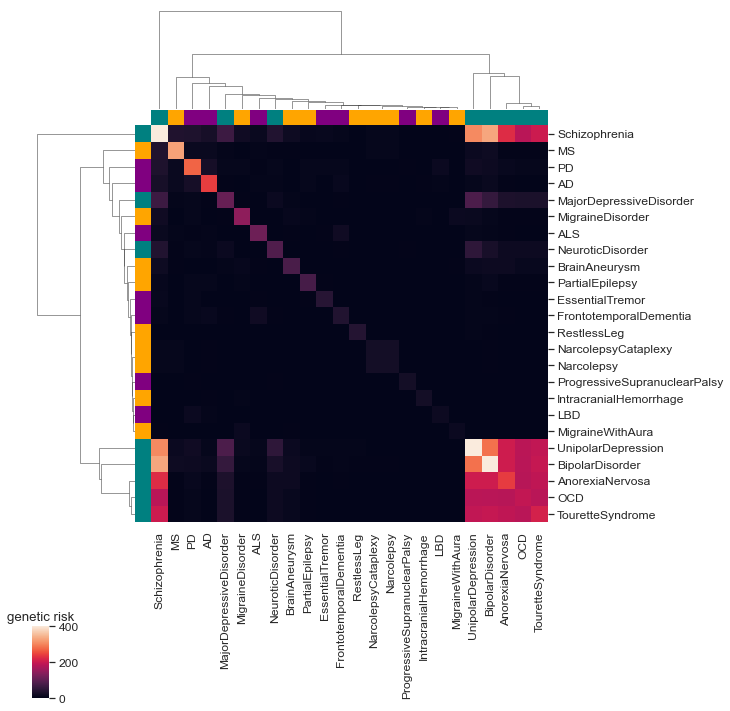

In [87]:
lut = {'AD' : 'purple',
 'ALS' : 'purple',
 'AnorexiaNervosa' : 'teal',
 'BipolarDisorder' : 'teal',
 'BrainAneurysm' : 'orange',
 'EssentialTremor' : 'purple',
 'FrontotemporalDementia' : 'purple',
 'IntracranialHemorrhage' : 'orange',
 'LBD' : 'purple',
 'MajorDepressiveDisorder' : 'teal',
 'MigraineDisorder' : 'orange',
 'MigraineWithAura' : 'orange',
 'MS' : 'orange',
 'NarcolepsyCataplexy' : 'orange',
 'Narcolepsy' : 'orange',
 'NeuroticDisorder' : 'teal',
 'OCD' : 'teal',
 'PartialEpilepsy' : 'orange',
 'PD' : 'purple',
 'ProgressiveSupranuclearPalsy' : 'purple',
 'RestlessLeg' : 'orange',
 'Schizophrenia' : 'teal',
 'TouretteSyndrome' : 'teal',
 'UnipolarDepression' : 'teal'}
row_colors = df.columns.unique().map(lut)



x0, _y0, _w, _h = g.cbar_pos

g = sns.clustermap(df.T.dot(df), vmax = 400, row_colors=row_colors, col_colors = row_colors)
g.ax_cbar.set_position([x0, 0.02, g.ax_row_dendrogram.get_position().width/6, 0.1])
g.ax_cbar.set_title('genetic risk')

plt.savefig('plots/01-clustering_genes_and_diseases/clustermap_disease_overlaps.png', dpi = 300)
plt.show()

In [32]:
df.T.dot(df).to_csv('processed_data/01-clustering_genes_and_diseases/counts_overlapping_genes.csv')

In [ ]:
['AD' : 'rebeccapurple',
 'ALS' : 'rebeccapurple',
 'AnorexiaNervosa' : 'teal',
 'BipolarDisorder' : 'teal',
 'BrainAneurysm' : 'darkorange',
 'EssentialTremor' : 'rebeccapurple',
 'FrontotemporalDementia' : 'rebeccapurple',
 'IntracranialHemorrhage' : 'darkorange',
 'LBD' : 'rebeccapurple',
 'MajorDepressiveDisorder' : 'teal',
 'MigraineDisorder' : 'darkorange',
 'MigraineWithAura' : 'darkorange',
 'MS' : 'darkorange',
 'NarcolepsyCataplexy' : 'darkorange',
 'Narcolepsy' : 'darkorange',
 'NeuroticDisorder' : 'teal',
 'OCD' : 'teal',
 'PartialEpilepsy' : 'darkorange',
 'PD' : 'rebeccapurple',
 'ProgressiveSupranuclearPalsy' : 'rebeccapurple',
 'RestlessLeg' : 'darkorange',
 'Schizophrenia' : 'teal',
 'TouretteSyndrome' : 'teal',
 'UnipolarDepression' : 'teal']

neurodegeneration - 'rebeccapurple'
neuropsychiatric - 'teal'
other - 'darkorange'